<a href="https://colab.research.google.com/github/hebermudezg/Machine-Learning/blob/master/Pix2Pix_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arquitectura Pix2Pix - flowers
---



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

In [0]:
%tensorflow_version 2.x

In [0]:
# importemos librerias
import tensorflow as tf # lib AI google
import numpy as np # computacion cientifica
import matplotlib.pyplot as plt # graficación

In [0]:
# Ruta Raiz
PATH = "/content/drive/My Drive/pix2pix_flowers"

# Ruta datos de entrada
INPATH = PATH + "/inputFlowers"
# Ruta de datos de salida
OUTPATH = PATH + "/targetFlowers"
# checkpoints
CKPATH = PATH + "/checkpoints"

In [0]:
# lista (el -1 es par que aparezca en una columna)
imgurls = !ls -1 "{INPATH}"

In [0]:
# vamos a tomar 500 imagenes de flores
n = 500
train_n = round(n*0.80)
train_n

400

In [0]:
# listado randonizado. 
randurls = np.copy(imgurls)
randurls

np.random.seed(23) # semilla
np.random.shuffle(randurls) # barajando aleatoriamente. 

# Paritición train/test
tr_urls = randurls[:train_n] 
ts_urls = randurls[train_n:n]

# tomamos solo 500 imagenes 400 train 100 test
print(len(imgurls), len(tr_urls), len(ts_urls))

7728 400 100


TypeError: ignored

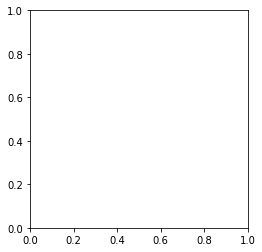

In [0]:
# Función para reesclar imagenes. 
IMG_WIDTH = 256
IMG_HEIGHT = 256

# funcion para reescalar imagens
def resize(inimg, tgimg, height, width):
  inimg = tf.image.resize(inimg, [height, width])
  tgimg = tf.image.resize(tgimg, [height, width])
  return inimg, tgimg
  
# Normalizar imagenes usemos dominio(-1, 1)
def normalize(inimg, tgimg):
  inimg = (inimg /  127.5) -1
  tgimg = (tgimg / 127.5) -1
  return inimg, tgimg


@tf.function()
# Aumentacion de datos: Random Crop+Flip
# tranformacion de datos para aumentar las imagenes (transformacion de las imagenes)
# voltear horizontal, cambiar tamaños... etc
def random_jitter(inimg, tgimg):
  inimg, tgimg = resize(inimg, tgimg, 286, 286)
  stacked_image = tf.stack([inimg, tgimg], axis = 0) # superponer imagenes
  cropped_image = tf.image.random_crop(stacked_image, size = [2, IMG_HEIGHT, IMG_WIDTH, 2]) # recorte aleatorio, 3 canales de color 
  inimg, tgimg = cropped_image[0], cropped_image[1]
  
  if tf.random.uniform(()) > 0.5:
    inimg = tf.image.flip_left_right(inimg)  # voltear imagenes
    tgimg = tf.image.flip_left_right(tgimg) # voltear imagenes
  return inimg, tgimg

# Función para cargar las imagenes

def load_image(filename, augment=True):
  inimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(INPATH + '/' + filename)), tf.float32)[..., :3]
  tgimg = tf.cast(tf.image.decode_jpeg(tf.io.read_file(OUTPATH + '/' + filename)), tf.float32)[..., :3] # cast tansformar a decimal
  inimg, tgimg = resize(inimg, tgimg, IMG_HEIGHT, IMG_WIDTH)
  if augment:
    inimg, tgimg = random_jitter(inimg, tgimg)
  inimg, tgimg = normalize(inimg, tgimg)
  return inimg, tgimg

def load_train_image(filename):
  return load_image(filename, True)

def load_test_image(filename):
  return load_image(filename, False)


plt.imshow(((load_train_image(randurls[0])[1]) +1) /2)